In [96]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [97]:
s=str.maketrans('','',punctuation)
a='salam!@'
a.translate(s)

'salam'

In [98]:
stop_word=stopwords.words('english')


In [99]:
negaitve_d=[]
max_len_negaitve=0
for file in os.listdir('data/neg'):
    with open('data/neg/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_negaitve:
        max_len_negaitve=len(token)
    doc=' '.join(token)
    negaitve_d.append(' '.join(token))
len(negaitve_d)

1000

In [100]:
posetive_d=[]
max_len_positive=0
for file in os.listdir('data/pos'):
    with open('data/pos/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_positive:
        max_len_positive=len(token)
    doc=' '.join(token)
    posetive_d.append(' '.join(token))
len(posetive_d)

1000

In [101]:
max_len = max(max_len_negaitve, max_len_positive)

In [102]:
random.shuffle(negaitve_d)
random.shuffle(posetive_d)

x_train=negaitve_d[:800]+posetive_d[:800]

In [103]:
y_train=[0 for _ in range(800)] +[1 for _ in range(800)]

In [104]:
x_test=negaitve_d[800:]+posetive_d[800:]

In [105]:
y_test=[0 for _ in range(200)] +[1 for _ in range(200)]


In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,Dropout
from tensorflow.keras.layers import concatenate

In [107]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

In [108]:
vocab_len=len(tokenizer.word_index)+1
vocab_len

40696

In [109]:
encoded=tokenizer.texts_to_sequences(x_train)
encoded

[[31,
  37,
  2521,
  10260,
  11450,
  15120,
  1646,
  11451,
  15121,
  171,
  135,
  31,
  2356,
  37,
  4795,
  31,
  4205,
  22,
  6,
  3917,
  135,
  3918,
  463,
  460,
  1110,
  3534,
  23986,
  1126,
  3122,
  3919,
  102,
  308,
  214,
  6147,
  7340,
  114,
  1014,
  15122,
  2303,
  27,
  5822,
  533,
  23987,
  3321,
  35,
  4581,
  2590,
  2643,
  23,
  23,
  31,
  1001,
  7341,
  175,
  23988,
  12948,
  1164,
  5515,
  1,
  256,
  90,
  1195,
  2591,
  1,
  2156,
  64,
  25,
  214,
  23989,
  12949,
  12950,
  134,
  15123,
  25,
  2718,
  132,
  5516,
  3043,
  5517,
  1505,
  15124,
  787,
  4796,
  23990,
  214,
  107,
  143,
  536,
  15125,
  4797,
  616,
  3205,
  1355,
  18343,
  15126,
  6881,
  18344,
  788,
  4,
  217,
  503,
  617,
  18345,
  272,
  1995,
  300,
  23991,
  18346,
  413,
  6882,
  2304,
  23992,
  7342,
  933,
  5518,
  15127,
  25,
  423,
  12951,
  823,
  4057,
  15128,
  788,
  160,
  3044,
  9341,
  5823,
  5519,
  15129,
  1800,
  1,
  24

In [110]:
paded=pad_sequences(encoded,maxlen=max_len,padding='post')
paded

array([[  31,   37, 2521, ...,    0,    0,    0],
       [1242, 1560, 2644, ...,    0,    0,    0],
       [  27,   16,  874, ...,    0,    0,    0],
       ...,
       [2046, 1003, 1372, ...,    0,    0,    0],
       [ 582,  442,   36, ...,    0,    0,    0],
       [   7, 1743, 1150, ...,    0,    0,    0]],
      shape=(1600, 1693), dtype=int32)

In [111]:
encoded_test=tokenizer.texts_to_sequences(x_test)
paded_test=pad_sequences(encoded_test,maxlen=max_len,padding='post')

In [112]:
input_1=Input(shape=(max_len,),)
embedding1=Embedding(vocab_len,100)(input_1)
conv1=Conv1D(filters=32,kernel_size=4,activation='relu')(embedding1)
drop_1=Dropout(0.5)(conv1)
max_pol1=MaxPool1D(pool_size=2)(drop_1)
flat1=Flatten()(max_pol1)



input_2=Input(shape=(max_len,),)
embedding2=Embedding(vocab_len,100)(input_2)
conv2=Conv1D(filters=32,kernel_size=6,activation='relu')(embedding2)
drop_2=Dropout(0.5)(conv2)
max_pol2=MaxPool1D(pool_size=2)(drop_2)
flat2=Flatten()(max_pol2)





input_3=Input(shape=(max_len,),)
embedding3=Embedding(vocab_len,100)(input_3)
conv3=Conv1D(filters=32,kernel_size=8,activation='relu')(embedding3)
drop_3=Dropout(0.5)(conv3)
max_pol3=MaxPool1D(pool_size=2)(drop_3)
flat3=Flatten()(max_pol3)





input_4=Input(shape=(max_len,),)
embedding4=Embedding(vocab_len,100)(input_4)
conv4=Conv1D(filters=32,kernel_size=10,activation='relu')(embedding4)
drop_4=Dropout(0.5)(conv4)
max_pol4=MaxPool1D(pool_size=2)(drop_4)
flat4=Flatten()(max_pol4)

conc=concatenate([flat1,flat2,flat3,flat4])


dense1=Dense(10,activation='relu')(conc)
output=Dense(1,activation='sigmoid')(dense1)

In [113]:
model = Model(inputs=[input_1,input_2,input_3,input_4], outputs=output)

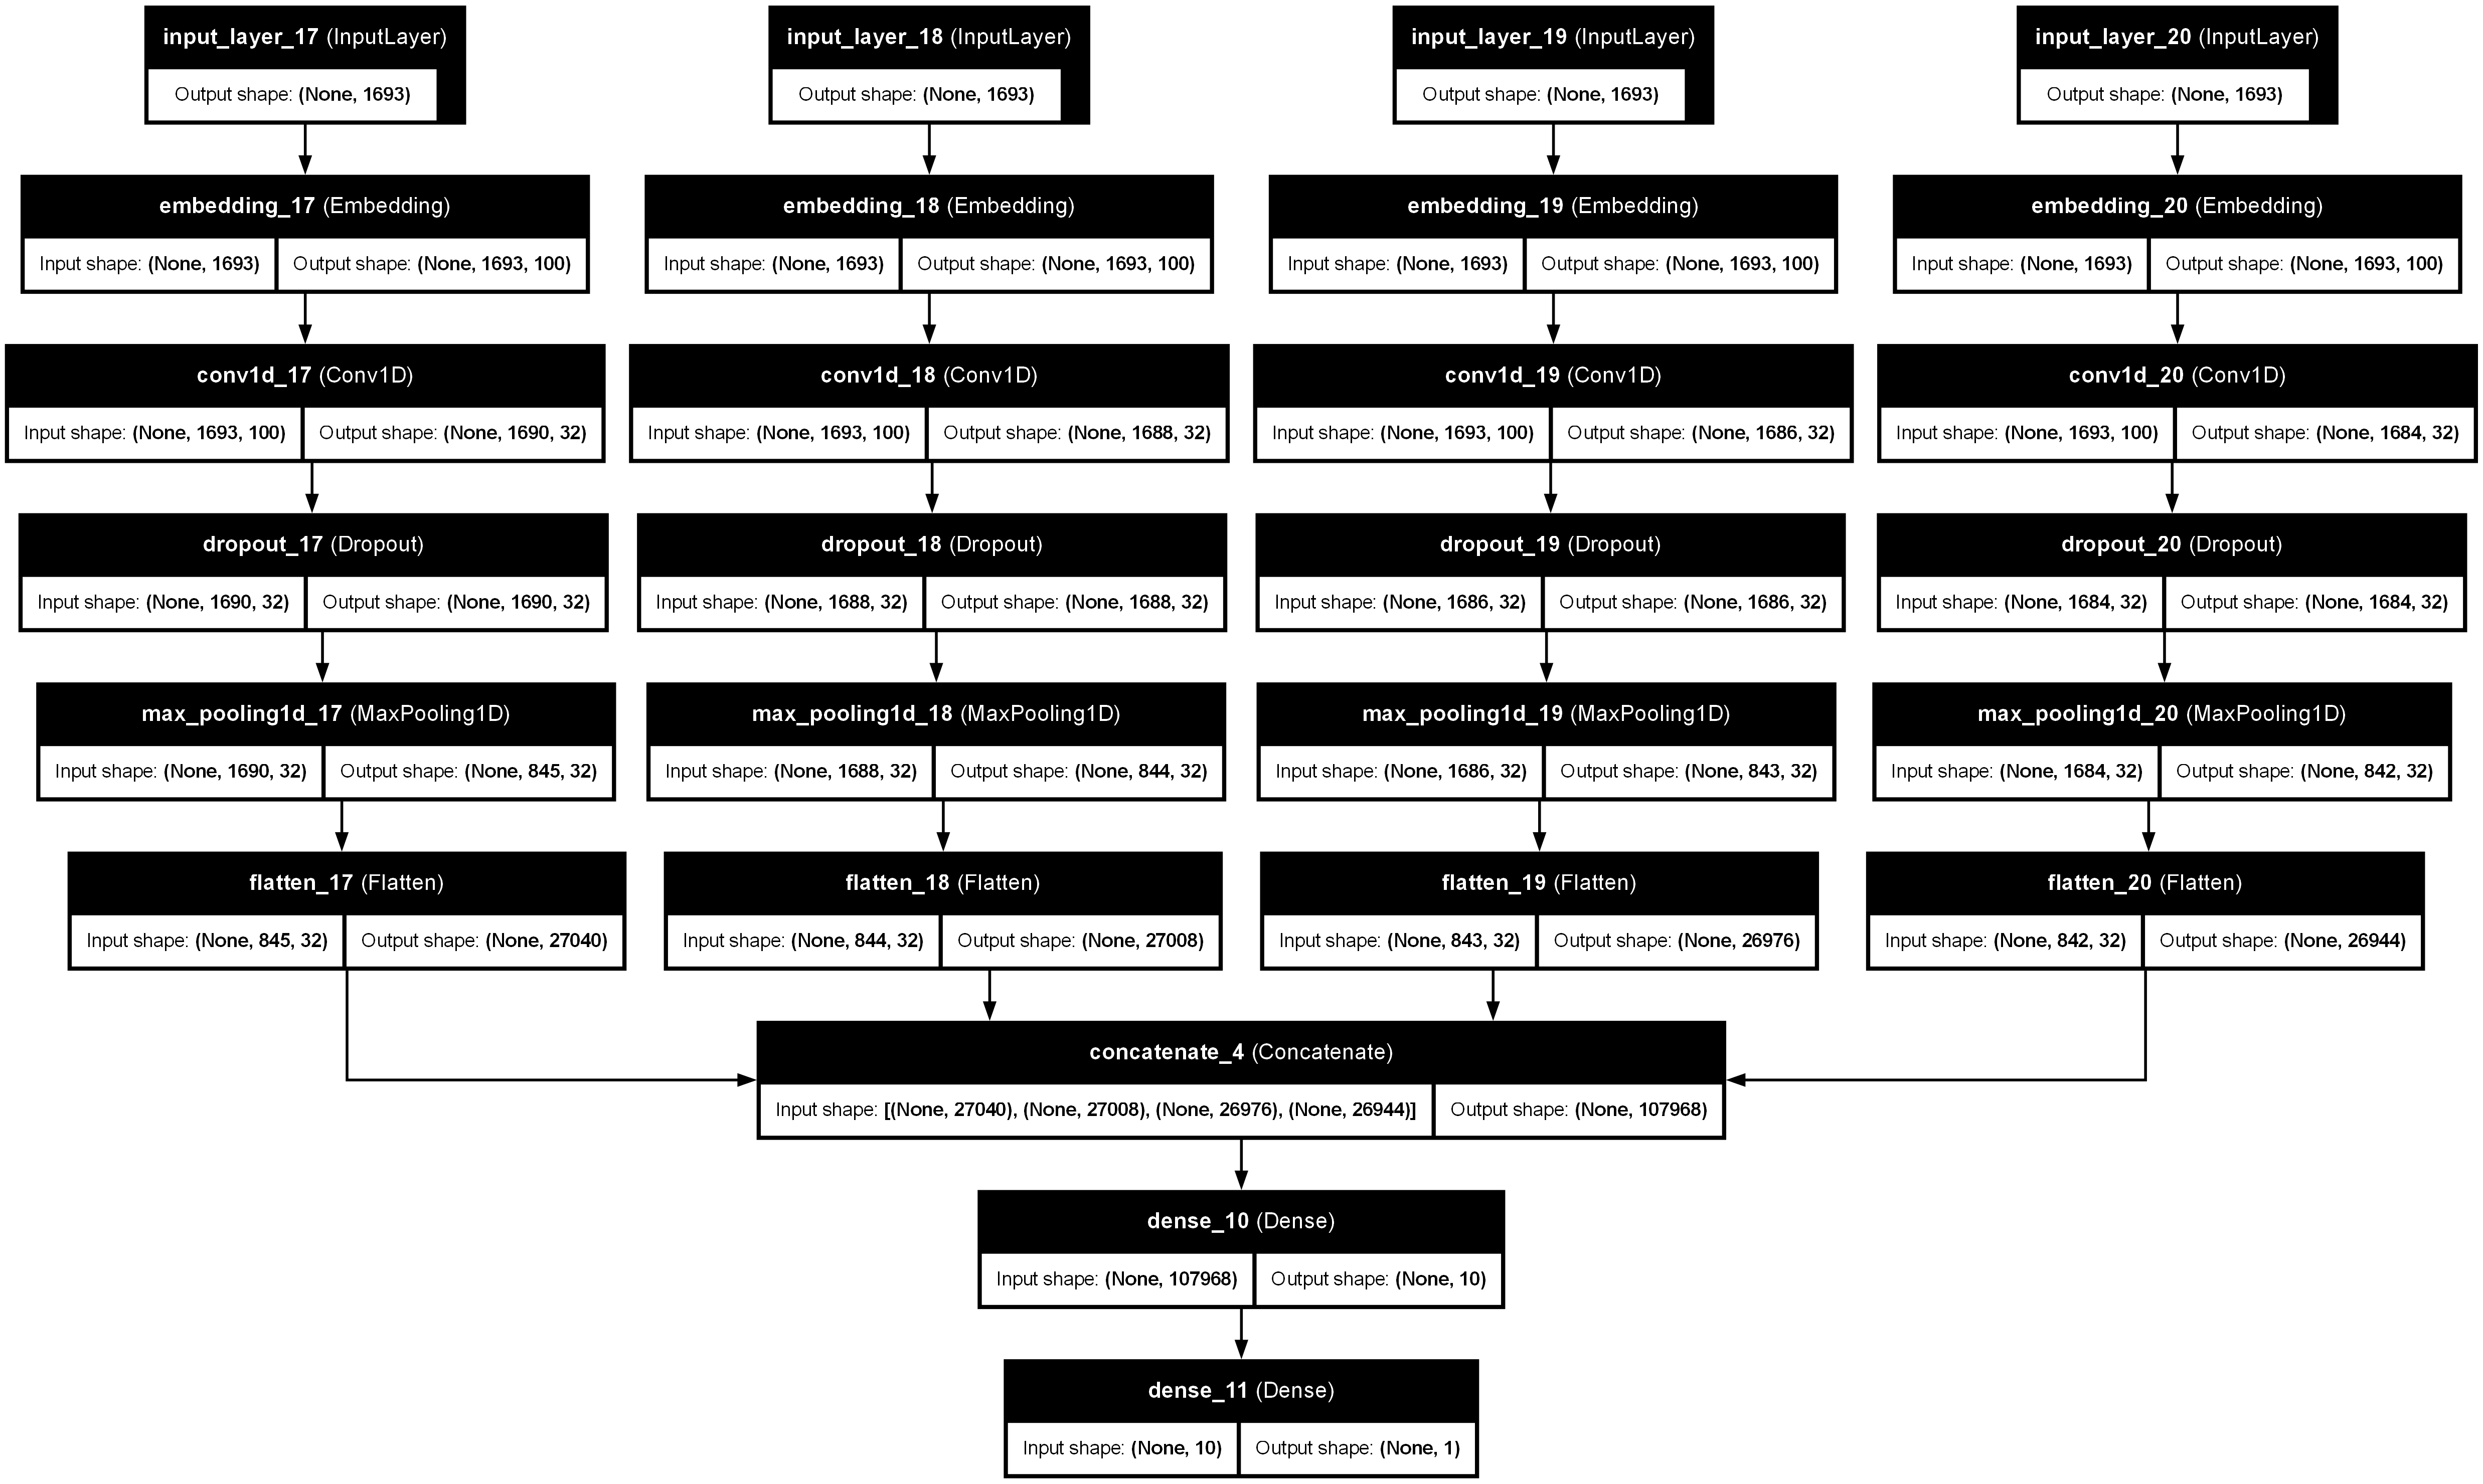

In [114]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [115]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 1693, 100) │  4,069,600 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 1693, 100) │  4,069,600 │ input_layer_18[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 1693, 100) │  4,069,600 │ input_layer_19[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_20        │ (None, 1693, 100) │  4,069,600 │ input_layer_20[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 1690, 32)  │     12,832 │ embedding_17[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 1688, 32)  │     19,232 │ embedding_18[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 1686, 32)  │     25,632 │ embedding_19[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 1684, 32)  │     32,032 │ embedding_20[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 1690, 32)  │          0 │ conv1d_17[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 1688, 32)  │          0 │ conv1d_18[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 1686, 32)  │          0 │ conv1d_19[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 1684, 32)  │          0 │ conv1d_20[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 845, 32)   │          0 │ dropout_17[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_18    │ (None, 844, 32)   │          0 │ dropout_18[0][0]  │
│ (MaxPooling1D)      │                   │            │                 

 Total params: 17,447,829 (66.56 MB)

 Trainable params: 17,447,829 (66.56 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [117]:
import numpy as np
model.fit([paded,paded,paded,paded], np.array(y_train), epochs=10, batch_size=20, validation_data=([paded_test,paded_test,paded_test,paded_test], np.array(y_test)))


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4988 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.4769 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 451ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.4950 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.4837 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - accuracy: 0.4888 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 

In [118]:
model.save('txt_ai.h5')

In [119]:
import pickle

with open('token.text', 'wb') as f:
    pickle.dump(tokenizer, f)

In [120]:
from tensorflow.keras.models import load_model
model=load_model('txt_ai.h5')

In [121]:
with open ('token.text','rb') as f:
    tokenizer=pickle.load(f)

In [122]:
txt="I hate this man"

In [124]:
txt_test=tokenizer.texts_to_sequences([txt])
txt_test=pad_sequences(txt_test,maxlen=max_len,padding='post')

In [127]:
txt_test.shape

(1, 1693)

In [129]:
model.predict([txt_test,txt_test,txt_test,txt_test])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


array([[0.500678]], dtype=float32)

In [132]:
model.predict([txt_test,txt_test,txt_test,txt_test])[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.float32(0.500678)

In [133]:
if (model.predict([txt_test,txt_test,txt_test,txt_test])[0][0]>0.5):
    print('negative')
else:
    print('positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
negative
